In [1]:
library(IRdisplay)

# GitHub & package control

In [2]:
# Fct - Welcome

intro <- function() {
    # Define the message
    message <- '<font size="4" color="yellow">
    Welcome to gcode turn down notebook: 
    </br>
     <font color="lime" size="3">
    &emsp;A notebook for creating the gcode to perform a common turn down operation by a CNC lathe
    </font>
    <br>
    <br>
    </font>'    

    # Display the message and wait for Enter key press
    invisible({
      display_html(message)
      readline(prompt = "Press Enter to continue...\n")
    })
}
intro()

Welcome to gcode turn down notebook: 
 
 
  A notebook for creating the gcode to perform a common turn down operation by a CNC lathe

Press Enter to continue...
 


In [3]:
intro_TD <- function () {    

    # fct call to begin turn_data fct
    msg <- '<font size="4" color="yellow">
         Turning data input: <br>
         <font color="red" size="3"> 
         &emsp; < Do NOT enter negative numbers >
         </font>
         <br>
         <br>
         </font>'

    # Display the message and wait for Enter key press
        invisible({
          display_html(msg)
          readline(prompt = "Press Enter to continue...\n")
        })
    Turn_Data()
}

In [4]:
# To re-start the Turn_Data( ) fct with data entry error is noticed

redo <- function() {
    # User prompt to restart Turn-Data ( ) 
    restart_input <- readline(prompt = paste("Review the input data.",
                              "Do you want to re-input the data? (yes/no): "))
    # If user chooses to re-input data
    if (tolower(restart_input) %in% c("yes", "y")) {
      # restart fct  
      Turn_Data()
     # If user does not want to re-input data
    } else if (tolower(restart_input) %in% c("no", "n")) {     
      cat("Exiting... leaving lathe data input function.", "\n")
      # All non y or n responses will restart 
    } else {
        # restart turn fct
       Turn_Data()
    }
}



# Prompts for User Input: lathe
    # Gets input for First Move
    # Gets input for Second Move

Turn_Data <- function() {
    
    valid_input <- FALSE    # Boolean switching value
    # restart <- TRUE    
   
    # while loop - while FALSE is true
    while (!valid_input) {        
        
        # Prompt the user for X value First Move (X start position)
        user_input <- readline(prompt = paste("What is Initial Stock Diameter?"))
        
        # Test if user input is not empty AND is numeric (data validation)
        if (user_input == "" || !is.numeric(user_input)) {
            # Assign X First Move (start position) to global variable
            Start_Diameter <<- user_input                
            # Convert X First Move variable to numeric
            Start_Diameter <<- as.numeric(unlist(strsplit(Start_Diameter, ", ")))
            # Set flag to exit the while loop
            valid_input <- TRUE  
            } # if validation

        # Prompt user for the X First Move (X final position)
        user_input <- readline(prompt = paste("What is the Finish Diameter?"))
        
        # Test user input (data validation )
        if (user_input == "" || !is.numeric(user_input)) {
           # Assign X First Move (final position) to global variable 
           End_Diameter  <<- user_input
           # Convert X First Move (final position) to numeric data type
           End_Diameter <<- as.numeric(unlist(strsplit(End_Diameter, ", ")))
           # Set flag to exit the while loop
           valid_input <- TRUE  
           } # end input / validation

        # prompt user for the X incremental value 
        # This value will be used with sequenced X moves
        user_input <- readline(prompt = paste("What is the depth of the rough cut?",
                                              "Ex: steel .010-.020 "))

        # Check if input is empty or not numeric
        if (user_input == "" || !is.numeric(user_input)) {
            # assign X incremental value to global variable
            Cut_Depth <<- user_input
            # Convert X incremental value to numeric data type
            Cut_Depth <<- as.numeric(unlist(strsplit(Cut_Depth, ", ")))
            # Set flag to exit the while loop
            valid_input <- TRUE  
            } # end input

        # prompt user for the Z value - Second Move 
        # This value will be used with sequenced Z moves)
        user_input <- readline(
            prompt = paste("What is length of the turning cut along the lathe Z axis?"))

        # Check if user input is empty or not numeric
        if (user_input == "" || !is.numeric(user_input)) {
            # Z incremental value
            Z_Traverse <<- user_input
            Z_Traverse <<- as.numeric(unlist(strsplit(Z_Traverse, ", ")))            
                      
            # Move the Z in the negative Z direction
            if (Z_Traverse <= 0) {
                cat("Invalid Z value: ", Z_Traverse, "Restarting data entry", "\n")
                Bailout()
                valid_input <- TRUE  # Set flag to exit the while loop
                }
            valid_input <- TRUE  # Set flag to exit the while loop
            } # end input 

        # Set flag to exit the outer while loop
        valid_input <- TRUE              
          
   }   # end while loop 
    
    # fct call 
    redo()
    
  } # end fct 
 

#### <font color = lime> Input: turning data

In [5]:
intro_TD()

Turning data input: 
 
   < Do NOT enter negative numbers >

Press Enter to continue...
 
What is Initial Stock Diameter? .5110
What is the Finish Diameter? .252
What is the depth of the rough cut? Ex: steel .010-.020  .015
What is length of the turning cut along the lathe Z axis? .95
Review the input data. Do you want to re-input the data? (yes/no):  N


Exiting... leaving lathe data input function. 


In [6]:
# Primary variables: the Four Moves which form the rectangular shape on the XZ plane for each turn

# Set scipen to a large value to remove ee values
options(scipen = 999)  

# Explicitly format Z_Traverse to a 3 digit value
a <- Z_Traverse
Z_Traverse <- format(a, nsmall = 3)
#  str(Z_Traverse)

# re-assign user input vars 
C <- Cut_Depth
T <- Z_Traverse
# To set the safe X position after a turn down
Retract_X <- Start_Diameter + .100
# To set the return postion of Z (Used with G90 - absolute position mode)
Home_Z <- 0

# this will be the maximum stock removed by the rough / finish turning operations
TotalTurnDown <- Start_Diameter - End_Diameter

Radius <- Start_Diameter / 2   # may be unused var

# change sign in case neg value entered for Z during prompt
if (Cut_Depth < 0)        
    Cut_Depth <- Cut_Depth *-1;
# is the integer value for the number of itinerations (turns) 
Turns <- TotalTurnDown / Cut_Depth       

#  variable used to track the reductions in diameter from each each roughing turn.  Assign initial value the start diameter
Changing_Diameter <- Start_Diameter 
# format to 4 places
ChangingDiameter <- format(Changing_Diameter, nsmall = 4)

#Initialize 4 empty dataframes to store the 4 turn-down moves made along the X and Z axes
# Use the for-loop to make the variable, Turns, number of turn-down moves.  

# Completes the dfs with majority of the postional gcode ( X moves and Z moves). 
# The optional final rough cut & finish cuts, will provide the remainder of gcode later


#  initialize df for X1 move positions
X1_df <- data.frame(X = numeric(0))

for (i in 1:Turns) {   
   
    # Create a new row df.  Use the Start_Diameter as the first X1 position
      new_row <- data.frame(X = Changing_Diameter)
      X1_df <- rbind(X1_df, new_row)      
      #  Update the reduced stock diameter - reduced by Cut_Depth for each roughing pass (ONLY X )
      Changing_Diameter <- Changing_Diameter - Cut_Depth
    }
# head(X1_df,2)

#Initialize empty dataframes to store Z values
Z1_df <- data.frame(Z = numeric(0))

# Convert to neg value w/ three decimals
chr_var <- Z_Traverse
# Convert character to numeric and change the sign
negative_Z <- as.numeric(chr_var) * -1
# format to 3 decimals
negative_3Z <- format(negative_Z, nsmall = 3)

#str(Z_Traverse)
for (i in 1:Turns) {   
   
    # Create a new row for each roughing turn      
      new_row <- data.frame(Z = negative_3Z)
      Z1_df <- rbind(Z1_df, new_row)      
      }
# tail(Z1_df, 2)

X2_df <- data.frame(X2 = numeric(0))

for (i in 1:Turns) {   
   
    # Create a new row for each roughing turn
      new_row <- data.frame(X2 = Retract_X)
      X2_df <- rbind(X2_df, new_row)      
      }
# head(X2_df,2)

Z2_df <- data.frame(Z2 = numeric(0))
Home_Z_3 <- format(Home_Z, nsmall = 3)

for (i in 1:Turns) {   
   
    # Create a new row for each roughing turn
      new_row <- data.frame(Z2 = Home_Z_3)
      Z2_df <- rbind(Z2_df, new_row)      
      }
# head( Z2_df,2)

#  The values from each of the rows from each of the 4 data frames get combined.
#  to form the pattern (df1[i] - df4[i].  The for-loop creates a sequence of this  [1:4] data pattern. 
#  This sequence of the pattern continues (Turn times).  This results in  all the values from the equally 
#  sized dfs gets combined into sequantial (df1[i], df2[i], df3[i], df4[i] repeated patterns in the final list.

# initialize an empty list
glist <- list()

# loop 
for(i in 1:Turns) {
    selected1 <- paste(X1_df$X[i], collapse = " ") # move down [i] row of each df
    selected2 <- paste(Z1_df$Z[i], collapse = " ")
    selected3 <- paste(X2_df$X2[i], collapse = " ")
    selected4 <- paste(Z2_df$Z2[i], collapse = " ")
    # combine the selected into new glist - creating the sequential pattern (df1[i] - df4[i])
    glist <- c(glist, list(selected1), list(selected2), list(selected3), list(selected4))   
    }

# The 4 sequenxced Moves for the rough turning process are added to an empty list

#  initiate a new empty list
gcode<- list()

# loop 
for(i in 1:Turns) {
    selected1 <- paste("G01", "X", X1_df$X[i], "F5",  collapse = " ") # move down [i] row of each df
    selected2 <- paste("G01", "Z", Z1_df$Z[i], "F3",  collapse = " ")
    selected3 <- paste("G00", "X", X2_df$X2[i], collapse = " ")
    selected4 <- paste("G00", "Z", Z2_df$Z2[i], collapse = " ")
    # combine the selected into new glist - creating the sequential pattern (df1[i] - df4[i])
    gcode <- c(gcode, list(selected1), list(selected2), list(selected3), list(selected4))   
    }

# length(gcode)
# gcode[1:8]

#  variable used to track the reductions in diameter from each each roughing turn.  Assign initial value the start diameter

# gcode has incremental positional pattern - every forth position
v <- 4
# Establish the frequency of the X1 positions form the patterns in glist
n <- length(glist) / 4

# The locations of each First Move (X1) in glist
X1_pattern <- seq(from = 1, by = v, length.out = n)

#  The final X1 value from glist - This value will be evaluated and used 
#    as the input X positional value for  Final Rough / Finish Cut fcts
LastX1_Value <- glist[X1_pattern[length(X1_pattern)]]
LastX1_Value  <- as.numeric(format(LastX1_Value, nsmall = 4))

#  Initiate an empty list - Used in gcode_shortlist fct to track the X1 values 
#  that come from the user prompted X1 values in RC and FC functions
getLastX <- list()


#  The function will add one additional sequence (Moves 1 - 4) to the end of the existing gcode list
#  LastX1_Value will be updated to track the changing X1 position
#  The 4 moves will update the gcode list. 

gcode_shortlist <- function (c) {    
    
    valid_input <- FALSE    # Boolean var used to control continued entry w/in loop
    
    # the passed value: user cut size
     Cut <- c
     Test_OverCut <- (LastX1_Value - Cut )
   
    while (!valid_input) {     
                
        if(Test_OverCut < End_Diameter ) {
            cat("User Entry Error: exceeded targeted stock finished diameter.  Exiting .... ")
            valid_input = TRUE
            }    
        
       # Update the variable that tracks the decreasing stock diameter 
        LastX1_Value <<- LastX1_Value - Cut
        # assign values to getLastX
        getLastX <<- c(getLastX, LastX1_Value)    # , after = length(getLastX)) 
      
        
       # cat("LastX1_Value less first Finish Cut value is: ", LastX1_Value, "\n")

        # create new sequence of the 4 moves, with the change being to X1
        gcode <<- c(gcode, paste("G01", "X", LastX1_Value, "F3", "   (+ RC/FC)", sep = " "))
        gcode<<- c(gcode, paste("G01", "Z", glist[2], "F3", "    (+ RC/FC)", sep = " "))
        gcode <<- c(gcode, paste("G00", "X", glist[3], "    (+ RC/FC)", sep = " "))
        gcode <<- c(gcode, paste("G00", "Z", glist[4], "             (+ RC/FC)", sep = " "))
        
        valid_input = TRUE
        
        # cat("Exiting gcode_shortlist ...", "\n")
        
    } # end while
        
} # end fct


# User option:  Y or N - take a last rough cutting turn w/ the existing Cut size

Rough_Cut <- function() {
    # Define the variables
    # LastX1_Value
    c <- Cut_Depth 
       
    #  User input with info
        user_input <- readline(
           paste("\n", "There has been,", nrow(X1_df) - 1, "turns that have reduced the stock diameter.", "\n",
            "The stock diameter is currently : ", format(LastX1_Value, nsmall = 4), "\n",
            "The size of each roughing cut is:", Cut_Depth, "\n",            
            "One additional roughing cut will reduce the stock diameter to:", format(LastX1_Value - Cut_Depth, nsmall = 4), "\n",  
            "The finished stock diameter is targeted to be the dimension:", format(End_Diameter, nsmall = 4), "\n", "\n",            
            "Taking this optional rough turning cut will leave a remaining diameter for finish cut(s): ", format(LastX1_Value - Cut_Depth - End_Diameter, nsmall = 4), "\n",
            "Enter Y to make one last rough cut now.", "\n", 
            "Enter N to exit rough cuts and go directly to the finish cuts options.", "\n\n"))
   
        # Convert input to uppercase for case-insensitive comparison
        user_input <- toupper(user_input)         
        testInput <- user_input
    
        # Check if the input is 'Y' or 'N'
        if (user_input == 'Y'  ) {

            # function call with the rough-cut size (Cut_Depth)
            gcode_shortlist(c)       
            cat("You entered Yes (Y). One last rough cut was taken.  Exiting ... rough cuts. ", "\n",
              "Proceding to the finish cut options.")
            # exit if / exit Rough Cut function

          } else if (testInput == 'N') {
                print("Exit without optional last rough cut.  Starting the finish cut options ...") 
                # Replace with your action for invalid input                                               
          } else {
                # print("Invalid input. Restarting ...")
                intro_RC()
          }    
}

In [7]:
# Fct to stop Jupyter processing notebook cells past this location
intro_RC <- function() {
    # Define the message
    message <- '<font size="4" color="yellow">
        Welcome to the rough cut option: 
        </br>
        <font color="lime" size="3"> 
        &emsp;  A final roughing cut can be performed. 
        </font>
        <br>
        </br>
        </font>'

    # Display the message and wait for Enter key press
    invisible({
      display_html(message)
      readline(prompt = "Press Enter to continue...\n")
    })
    
    Rough_Cut()
}

#### <font color = lime> Input: roughing cut options 


In [8]:
intro_RC()

Welcome to the rough cut option: 
 
 
   A final roughing cut can be performed.

Press Enter to continue...
 

 There has been, 16 turns that have reduced the stock diameter. 
 The stock diameter is currently :  0.2710 
 The size of each roughing cut is: 0.015 
 One additional roughing cut will reduce the stock diameter to: 0.2560 
 The finished stock diameter is targeted to be the dimension: 0.2520 
 
 Taking this optional rough turning cut will leave a remaining diameter for finish cut(s):  0.0040 
 Enter Y to make one last rough cut now. 
 Enter N to exit rough cuts and go directly to the finish cuts options. 

 Y


You entered Yes (Y). One last rough cut was taken.  Exiting ... rough cuts.  
 Proceding to the finish cut options.

In [9]:
# Function to reduce the diameter to End_Diameter in granular sized cut(s) smaller than the roughing cut

Finish_Cut <- function() { 
    
    valid_input <- FALSE

    while (!valid_input) {       
        
    # Display message with remaining unturned dimensional value(s), and prompt user to enter a finish cut dimension
        user_input <- readline(
                paste("The diameter of stock remaining to be removed before a finish cut is:", "\n", 
                format(LastX1_Value - End_Diameter, nsmall = 4), "\n", 
                "Enter the dimension for taking one or more finish cuts (.0xx) :","\n" ))        
                         
        # var assisgned the user entered finish cut size
        FinisCut <- as.numeric(user_input) 
    
        if(LastX1_Value - End_Diameter > 0) {
    
            # Fct call, passes the var
            gcode_shortlist(FinisCut)
            
            if(LastX1_Value - End_Diameter == 0) {
                cat("TRUE True true true LastX1_Value - End_Diameter = 0 ", "\n")
                valid_input = TRUE
                cat("Exiting ... finish cut")
                }
            #  rerun finish cuts - when there is more than one finish cut
            else if(LastX1_Value - End_Diameter > 0) {
                Finish_Cut()
                }  
            
            
            #exit msg after fct call
            cat("Exiting finish_cut ...", "\n")
            # exit from while loop
            valid_input = TRUE               
            }
        #  Needs work w/neg values
        else if(LastX1_Value - End_Diameter <= 0) {
            valid_input = TRUE        
            cat("Leaving Finish_Cut fct.", "\n")
            }
        } # end while
    } # end fct        

# Function to prompt user for decision to make finish turn(s)
Finish_Prompt <- function() {
    
    user_input <<- readline(
                paste(
                "The stock diameter is currently : " , format(LastX1_Value, nsmall=4), "\n",
                "The final stock diameter remaining to be turned down is:", format(LastX1_Value - End_Diameter, nsmall = 4) , "\n",            
                "Enter Y to make one or more finish cuts.", "\n",
                "Or enter N to exit and accept the current stock diameter.", "\n", "\n"))

        # Convert input to uppercase for case-insensitive comparison
        user_input <- toupper(user_input)
        # assign user input value
        yes_answer <- user_input
    
   
        # Check if the input is 'Y' or 'N'
        if (yes_answer == 'Y'  ) {
            # Function call            
            Finish_Cut()           
            } # The exit after traveling some
        if(yes_answer == 'N' ) {
            cat("Exiting with no finish cut.", "\n")
            
         } else {
                print("Invalid input. Restarting ...")
                intro_FC()
          }    
            
    } # end fct

In [10]:
# Fct to stop Jupyter processing notebook cells past this location
intro_FC <- function() {
    # Define the message
    message <- '<font size="4" color="yellow">
          Welcome to the finish cut options: 
         <br>
         <font color = "lime" size = "3" >
         &emsp; One or more finish cuts of varying dimensions can be performed.
         </font>
         <br>
         <br>
         </font>'

    # Display the message and wait for Enter key press
    invisible({
      display_html(message)
      readline(prompt = "Press Enter to continue...\n")
    })
    
    Finish_Prompt()
    
}
    
    

#### <font color = lime> Input: finish cut(s)

In [11]:
intro_FC()  

Welcome to the finish cut options: 
 
 
   One or more finish cuts of varying dimensions can be performed.

Press Enter to continue...
 
The stock diameter is currently :  0.2560 
 The final stock diameter remaining to be turned down is: 0.0040 
 Enter Y to make one or more finish cuts. 
 Or enter N to exit and accept the current stock diameter. 
 
 Y
The diameter of stock remaining to be removed before a finish cut is: 
 0.0040 
 Enter the dimension for taking one or more finish cuts (.0xx) : 
 .004


Welcome to the finish cut options: 
 
 
   One or more finish cuts of varying dimensions can be performed.

Press Enter to continue...
 
The stock diameter is currently :  0.2520 
 The final stock diameter remaining to be turned down is: 0.0000 
 Enter Y to make one or more finish cuts. 
 Or enter N to exit and accept the current stock diameter. 
 
 N


TRUE True true true LastX1_Value - End_Diameter = 0  
Exiting ... finish cutExiting finish_cut ... 
[1] "Invalid input. Restarting ..."
Exiting with no finish cut. 


In [12]:
# convert gcode list to gcode vector data structure
gcode_Vector <- paste(gcode, sep = " ")
# Create data frame from the gcode character vector 
gcode_df <- data.frame(gcode = gcode_Vector)
# s/b same as gcode length from above
# nrow(gcode_df)


# Create a data frame with the typical lathe preface gcode
Intro_gcodes <- data.frame(gcode = c("%", "(Straigh Roughing Profile)", "(Lathe gcodes:)", "G07  ( lathe radius mode )", "G18   ( Plane: ZX )", "G20   (  inches for length units )", "G40   (  cancel the cutter compensation. )", "G49   ( cancel tool length offset )", "G90   ( distance mode: ABSOLUTE )", "G94   ( reset feed rate: inches / minute - Fx )", " ", " ", "G91 G28 X.25 Z.250 (fast move away and back)", "G90", "G28 X0.0 Z0.0 (Part Zero - homing sequence)","G01 Z0.20 F5", "G01 Z0.00  (Z should be touching face of part again)", "G00 X0.75 (Verify Position on Part. Turn the steppers back to ON SWITCH)","M00  (Paused)", " "))

# combine intro code with main gcode data
gcode2 <- as.data.frame(rbind(Intro_gcodes, gcode_df) )  # combine dfs


# Add the concluding positioning of X and Z.  Add the end of gcode file character, % 
closer <- data.frame(gcode = c("G01 X0.00 F3  (Move to Zero Home)", "G00 Z .75  (Move away from part)", "M30  (Rewind to start. Use M02 to restart in current end state.)", "%", "\n", "%" ))
# closer


# combine closer gcode with the main gcode
gcode3 <- as.data.frame(rbind(gcode2, closer) )  # combine dfs

#### <font color = lime> write: gcode to .csv file

In [13]:
write.csv(gcode3, file = "turn_down.ngc", row.names = FALSE, , quote = FALSE)

In [14]:
# Define the message
message <- '<font size="4" color="yellow">
        Message: The turn down gcode file is completed. 
        <br>
        <font color = "lime" size = "3">
        &emsp; The gcode file has been created named: turn_down.ngc 
        <br>
        </font>
        <br>
        </font>'

    invisible({
      display_html(message)
      readline(prompt = "Press Enter to continue...\n")
    })


Message: The turn down gcode file is completed. 
 
 
   The gcode file has been created named: turn_down.ngc

Press Enter to continue...
 


#### <font color = lime> read: gcode from .csv file

In [15]:
gcode <- read.csv("turn_down.ngc")

#### <font color = lime> Lathe plots:

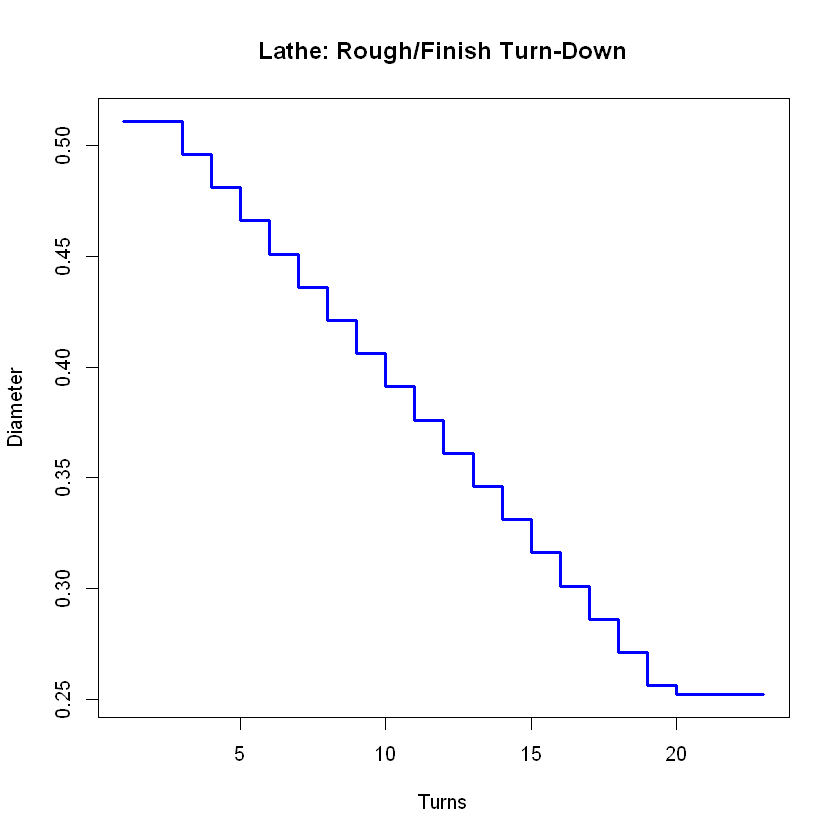

In [16]:
#  combine the two sources of X1 positional data into a single list for plotting

#empty list
xPos_List <- list()
# convert the df data of X1 values into list data
for( i in 1:nrow(X1_df)) {
    temp <- X1_df[i,]
    xPos_List <- append(xPos_List, temp)
    }

# combine the X1 values from rough cut / finish cut options with the other X1 values in list

x_All_List <- append(xPos_List, getLastX)

# for plotting effect, create lead  / follow values to represent the starting stock diameter and ending stock diameter
X_lead <- rep(x_All_List[1], 2)
X_follow <- rep(x_All_List[length(x_All_List)], 2)

x_All_list_lead <- append(X_lead, x_All_List)
# "--------------------------------------------------------"

# the Y values for plotting 
X1_Plot_y<- append(x_All_list_lead, X_follow)   

# the X increments for plotting 
X1_Plot_x <- seq(1, length(X1_Plot_y), 1)


# Plot using X1 list data with extensions for start dia / end dia

plot(x = X1_Plot_x, y = X1_Plot_y, 
     type = "S", lwd = 3, 
     col = "blue", 
     main = "Lathe: Rough/Finish Turn-Down", 
     xlab = "Turns", ylab = "Diameter")

In [17]:
# Plot using df data
# combine the X1 move data ( combine X1_df with getLastX  ) for plotting

# the X1 moves derived from Rough Cut / Finish Cut fcts
getLastX <- as.numeric(getLastX) 

# create df
getLastX_df <- data.frame(X = getLastX)

# combine the two X1 move sources
plotX <- rbind(X1_df, getLastX_df)

# create the data for an index column 
dex <- seq(from = 1, to = nrow(plotX), by = 1 )
dex_df <- data.frame(Y = dex)

# create a data frame with the index column and the X1 moves
plotData <- data.frame(X = dex_df, Y = plotX)

# plot the X1 moves - which result in the reduction of the diameter
# plot(plotData, type = "s", col = "blue", lwd = 4,  main = "Lathe: Rough/Finish Turn-Down", xlab = "Turns", ylab = "Diameter")

In [18]:
# Display the message and wait for Enter key press
message <- "<font color = yellow> Ending lathe gcode notebook."
    invisible({
      IRdisplay::display_html(message)
      readline(prompt = "Press Enter to continue...")
    })

Ending lathe gcode notebook.

Press Enter to continue... 


#### <font color = yellow> gcode display

In [19]:
gcode

gcode
<chr>
%
(Straigh Roughing Profile)
(Lathe gcodes:)
G07 ( lathe radius mode )
G18 ( Plane: ZX )
G20 ( inches for length units )
G40 ( cancel the cutter compensation. )
G49 ( cancel tool length offset )
G90 ( distance mode: ABSOLUTE )


##### <font color = lime> version / package control


####   # Done and preserved as markdown



    R version 4.3.0 (2023-04-21 ucrt)
    Platform: x86_64-w64-mingw32/x64 (64-bit)
    Running under: Windows 10 x64 (build 19045)

    Matrix products: default


    locale:
    [1] LC_COLLATE=English_United States.utf8 
    [2] LC_CTYPE=English_United States.utf8   
    [3] LC_MONETARY=English_United States.utf8
    [4] LC_NUMERIC=C                          
    [5] LC_TIME=English_United States.utf8    

    time zone: America/Anchorage
    tzcode source: internal

    attached base packages:
    [1] stats     graphics  grDevices utils     datasets  methods   base     

    other attached packages:
    [1] IRdisplay_1.1    

    loaded via a namespace (and not attached):
     [1] digest_0.6.31   utf8_1.2.3      base64enc_0.1-3 fastmap_1.1.1  
     [5] glue_1.6.2      htmltools_0.5.7 repr_1.1.6      lifecycle_1.0.4
     [9] cli_3.6.1       fansi_1.0.4     vctrs_0.6.5     pbdZMQ_0.3-9   
    [13] compiler_4.3.0  tools_4.3.0     evaluate_0.23   pillar_1.9.0   
    [17] crayon_1.5.2    rlang_1.1.1     jsonlite_1.8.4  IRkernel_1.3.2 
    [21] uuid_1.1-0     